## Flight Status

For this problem, I will be working with [flight data from the Bureau of Transporttaion Statistics](http://stat-computing.org/dataexpo/2009/the-data.html).

Write a function that takes a year as an input argument and loads the data for that year into a `pandas` dataframe, then drops the rows in the dataframe that have a null in any of these columns: "Year", "Month", "DayofMonth", "DepTime", "Origin", and "Dest", and then returns this dataframe. 

In [1]:
import pandas as pd
from pprint import pprint
from collections import defaultdict

Create keys so I can later filter out any Null values in these columns.

In [2]:
filter_keys = ["Year", "Month", "DayofMonth", "DepTime", 
                   "Origin", "Dest"]

Following cell allows you to load all csv's you want and then stores them in dict. This way, in each function we can just access the Dataframe for each year without having to read in the csv.

In [21]:
# Fxn takes list of years
def load_csv_data(years):
    year_df = defaultdict(dict)
    # years_ must contain all files you want to use
    for year in years:
        file_name = '/Users/ianfitzsimmons/dev/School/DSCI511/assignments/assignment-3/data/' + year + '.csv'
#         file_name = 'data/' + year +'.csv'
        data = pd.read_csv(file_name)
        display(data.head())
        year_df[year] = data
    return year_df

Load pandas dataframes into ```yearly_info_dic```

In [22]:
years_csv = ['2007', '2008']
yearly_info_dic = load_csv_data(years_csv)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Add column to the dataframes that combines the date descriptor columns into on column that has the full date

In [24]:
def add_full_data_col(data):
    mod_dic = {}
    for year, year_data in data.items():
        df = year_data.dropna(subset=filter_keys)
        date_time = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))
        date_time_series = pd.Series(date_time)
        date_time_df = pd.DataFrame({'DepDate': date_time_series})
        new_df = pd.concat([df, date_time_df], axis=1)
        mod_dic[year] = new_df
    return mod_dic
        
yearly_info_upd = add_full_data_col(yearly_info_dic)
display(yearly_info_upd['2007']['DepDate'])

0         2007-01-01
1         2007-01-01
2         2007-01-01
3         2007-01-01
4         2007-01-01
5         2007-01-01
6         2007-01-01
7         2007-01-01
8         2007-01-01
9         2007-01-01
10        2007-01-01
11        2007-01-01
12        2007-01-01
13        2007-01-01
14        2007-01-01
15        2007-01-01
16        2007-01-01
17        2007-01-01
18        2007-01-01
19        2007-01-01
20        2007-01-01
21        2007-01-01
22        2007-01-01
23        2007-01-01
24        2007-01-01
25        2007-01-01
26        2007-01-01
27        2007-01-01
28        2007-01-01
29        2007-01-01
             ...    
7453184   2007-12-15
7453185   2007-12-15
7453186   2007-12-15
7453187   2007-12-15
7453188   2007-12-15
7453189   2007-12-15
7453190   2007-12-15
7453191   2007-12-15
7453192   2007-12-15
7453193   2007-12-15
7453194   2007-12-15
7453195   2007-12-15
7453196   2007-12-15
7453197   2007-12-15
7453198   2007-12-15
7453200   2007-12-15
7453201   200

Write a function that returns the data from a specific airport in a given year.

In [25]:
def find_origin(year, code):
    code = code.upper()
    data = yearly_info_upd[year]
    filtered_origin = data.loc[data.Origin == code]
    return filtered_origin

data_frame_or = find_origin('2007', 'STl')
display(data_frame_or.Origin)

72         STL
73         STL
74         STL
75         STL
76         STL
77         STL
78         STL
79         STL
80         STL
81         STL
82         STL
83         STL
84         STL
85         STL
86         STL
87         STL
88         STL
89         STL
90         STL
91         STL
92         STL
93         STL
94         STL
95         STL
96         STL
97         STL
98         STL
99         STL
100        STL
101        STL
          ... 
7442005    STL
7442585    STL
7443192    STL
7443225    STL
7443377    STL
7443952    STL
7444489    STL
7444518    STL
7444638    STL
7445096    STL
7445639    STL
7446364    STL
7446948    STL
7447128    STL
7447710    STL
7448287    STL
7448317    STL
7448454    STL
7448977    STL
7449570    STL
7449600    STL
7450303    STL
7450914    STL
7450947    STL
7451097    STL
7451677    STL
7452288    STL
7452321    STL
7452471    STL
7453044    STL
Name: Origin, Length: 63564, dtype: object

Use above function to find the busiest month in each year for the given airport

In [27]:
import calendar

In [28]:
years_of_interest = ['2007', '2008']
airport_code = 'PHL'

for year in years_of_interest:
    phl_info = find_origin(year, airport_code)
    groups = phl_info.groupby(['Month'])
    busiest_month_count = 0
    for group in groups:
        month_count = group[1]['Month'].count()
        month_num = int(group[1]['Month'].mean())
        if month_count > busiest_month_count:
            busiest_month = calendar.month_name[month_num]
            busiest_month_count = month_count
    print('%s was the busiest month in %s with %s flights out of %s.\n' % (busiest_month, year, busiest_month_count, 
                                                                           airport_code))

May was the busiest month in 2007 with 8928 flights out of PHL.

July was the busiest month in 2008 with 8698 flights out of PHL.



Create a function that takes two dates and an airport code that will return the flights from that airport between those dates. 

For now, this function will only work if the dates given don't span across more than 2 years.

Using this function, get all the flight data for flights from PHL for all of 2007 and 2008. Then, create a daily count of flights over all of the days in the two years.

In [30]:
import dateparser

In [35]:
def find_origin_timeframe(date_1, date_2, code):
    code = code.upper()
    date_1 = dateparser.parse(date_1)
    date_2 = dateparser.parse(date_2)
    date_start = min(date_1, date_2)
    date_end = max(date_1, date_2)
    if date_start == date_end:
        print('Invalid dates entered')
        return
    year_1 = date_start.year
    year_2 = date_end.year
    data = yearly_info_upd[str(year_1)]
    if year_1 != year_2:
        data_2 = yearly_info_upd[str(year_2)]
        data_tot = data.append(data_2, ignore_index=True)
    filtered_origin = data_tot.loc[data_tot.Origin == code]
    filtered_origin = filtered_origin[(filtered_origin.DepDate >= date_start) & (filtered_origin.DepDate <= date_end)]
    return filtered_origin

In [36]:
flight_data = find_origin_timeframe('2007-01-01', '2008-12-31', airport_code)
print('Ding!')

Ding!


In [37]:
display(flight_data.head())
display(flight_data.tail())  # Weird that tail ends on 13th of December 2008, but sample returns an entry on 12/23/2018
display(flight_data.sample(30))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
2440,2007,1,2,2,1104.0,1105,1158.0,1205,WN,262,...,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2441,2007,1,2,2,1616.0,1615,1734.0,1715,WN,899,...,34.0,0,NaN,0,0.0,0.0,19.0,0.0,0.0,2007-01-02
2442,2007,1,2,2,829.0,830,934.0,945,WN,2023,...,24.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2443,2007,1,2,2,1834.0,1820,1954.0,1940,WN,2256,...,29.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2444,2007,1,2,2,700.0,655,806.0,815,WN,2939,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
14165531,2008,12,13,6,1131.0,1131,1335.0,1355,DL,1013,...,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14165532,2008,12,13,6,1233.0,1240,1448.0,1457,DL,1015,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14165534,2008,12,13,6,1354.0,1356,1606.0,1618,DL,1017,...,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14165536,2008,12,13,6,1659.0,1655,1902.0,1920,DL,1019,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14165661,2008,12,13,6,657.0,705,955.0,1020,DL,1187,...,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
9314424,2008,4,29,2,2030.0,2035,2143.0,2200,US,1406,...,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-04-29
8523963,2008,3,31,1,2007.0,1920,2256.0,2210,WN,212,...,25.0,0,NaN,0,0.0,0.0,0.0,0.0,46.0,2008-03-31
12166914,2008,9,4,4,608.0,610,747.0,802,OH,6405,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-09-04
7448787,2008,1,16,3,740.0,740,1004.0,940,OH,5241,...,52.0,0,NaN,0,0.0,0.0,24.0,0.0,0.0,2008-01-16
2664821,2007,5,13,7,947.0,955,1244.0,1255,US,763,...,31.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-05-13
5167327,2007,9,21,5,1818.0,1820,2053.0,2125,US,715,...,26.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-09-21
9898938,2008,5,23,5,1543.0,1530,1656.0,1650,US,701,...,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-05-23
2613895,2007,5,18,5,1950.0,1950,2131.0,2132,UA,519,...,57.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-05-18
2663311,2007,5,11,5,529.0,530,645.0,655,US,1416,...,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-05-11
315729,2007,1,27,6,1711.0,1716,2004.0,2035,DL,1769,...,13.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-27


In [39]:
daily_counts = flight_data.groupby('DepDate').size().to_frame('count').reset_index()
display(daily_counts)

,DepDate,count
0,2007-01-01,267
1,2007-01-02,300
2,2007-01-03,298
3,2007-01-04,297
4,2007-01-05,282
5,2007-01-06,230
6,2007-01-07,262
7,2007-01-08,289
8,2007-01-09,294
9,2007-01-10,294


Display the daily counts in a plot. 

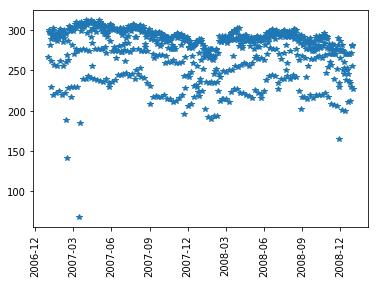

In [40]:
import matplotlib.pyplot as plt

df = daily_counts.sort_values('DepDate', ascending=True)
plt.plot(df['DepDate'], df['count'], '*')
plt.xticks(rotation='vertical')
plt.show()